Using TensorFlow backend.


Loading review data....
loading Pickle files..
Pickle file loaded.
             overall  helpful_positive    helpful_all
count  347393.000000     347393.000000  347393.000000
mean        4.307018          4.529829       5.277182
std         1.074630         44.261312      46.458016
min         1.000000          0.000000       0.000000
25%         4.000000          0.000000       0.000000
50%         5.000000          0.000000       0.000000
75%         5.000000          1.000000       2.000000
max         5.000000       7273.000000    7637.000000
255002
Data loaded
    overall                                         reviewText  \
45      3.0  I purchased this mount for my 37 inch LCD TV. ...   
53      5.0  Months later, I am still happy with this Table...   
59      5.0  The Nook Tablet is a solid hybrid tablet/eBook...   
60      1.0  The customer support people at Barnes & Noble ...   
68      5.0  I have been an Amazon fan for a long time. My ...   

    helpful_positive  helpful_a

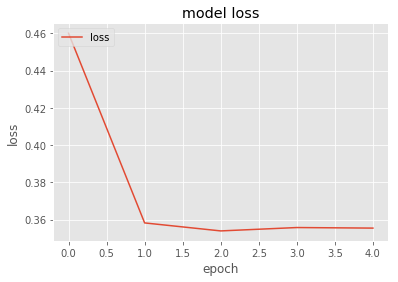

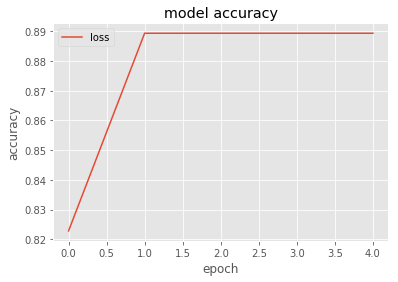

In [1]:
from TextFeatureExtraction import text_feature_extraction
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Conv1D, MaxPooling1D, Dense, Dropout, Activation, Flatten
from slim21 import LSTMs
import keras
from sklearn import metrics
import numpy as np

def train_with_lstm(X_train, X_test, y_train, y_test):
    # Embedding
    max_features = 100
    maxlen = 30
    embedding_size = 64
    # Training
    batch_size = 500
    epochs = 5

    print('Build model...')

    model = Sequential()
    model.add(Embedding(max_features, embedding_size, input_length=X_train.shape[1]))
    model.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Dropout(0.3))
    model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Dropout(0.4))
    model.add(LSTM(units=70,activation='sigmoid',input_shape=X_train.shape[1:]))    
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    print('Train...')
    
    
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True,validation_data=(X_test, y_test))
    

    print(model.evaluate(X_test, y_test)[0],model.evaluate(X_test, y_test)[1])
    print(history.history.keys())
    plt.style.use('ggplot')
#     plt.plot(history.history['acc'])
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.style.use('ggplot')
#     plt.plot(history.history['acc'])
    plt.plot(history.history['acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['loss'], loc='upper left')
    plt.show()

def training_models():

    data, features= text_feature_extraction()
    Y = pd.get_dummies(data['Helpful'])
    
    X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.33, random_state=42)
    #42 is the ultra number!!!!!!
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    # train_in_specific(X_train, X_test, y_train, y_test)
    train_with_lstm(X_train, X_test, y_train, y_test)

if __name__ == "__main__":
    training_models()